# Chapter_3:

## Tensorflow & Keras:
**`Tensorflow`** is a machine learning platform. Much like NumPy, the primary purpose of TensorFlow is to manipulate mathematical expressions over numerical tensors. But it differs from Numpy in:
>>* It can **automatically compute the gradient of any differentiable expression**, making it highly suitable for machine learning.
>>* It can **run not only on CPUs**, but also on GPUs and TPUs, highly parallel hardware accelerators.
>>* Computation defined in TensorFlow can be easily distributed across many machine.
>>* TensorFlow programs can be exported to other runtimes, such as `C++, JavaScript (for browser-based applications)`, or **`TensorFlow Lite (for applications running on mobile devices or embedded devices)`**, etc.

>* TensorFlow is called `TensorFlow` because it handles the flow (node/mathematical operation) of Tensors. 

>* **`It’s important to keep in mind that TensorFlow is much more than a single library.`** It’s really a platform, home to a vast ecosystem of components, some developed by Google and some developed by third parties. For instance, there’s TF-Agents for reinforcement-learning research, TFX for industry-strength machine learning workflow management, TensorFlow Serving for production deployment, and there’s the <font color = 'red'>**TensorFlow Hub repository of pretrained models**</font>. Together, these components cover a very wide range of use cases, from cutting-edge research to large-scale production applications.


>* `**Keras**` is a deep learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep learning model. **`Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.`** (Because it is high-level of abstraction, focus on the idea not on the implementation like Tensorflow which is low-level abstraction.)


>* **`Through TensorFlow, Keras can run on top of different types of hardware`** —GPU, TPU, or plain CPU—and can be seamlessly scaled to thousands of machines.

>* `Keras` is an API for human beings, not machines. It follows best practices for reducing cognitive load: it offers consistent and simple workflows, it minimizes the number of actions required for common use cases, and it provides clear and actionable feedback upon user error. This makes Keras easy to learn for a beginner, and highly productive to use for an expert.

>* You could use **`Keras`** as you would use `Scikit-learn`—**just calling `fit()`** and letting the framework do its thing—or you could be using it `like NumPy`—**taking full control of every little detail.**

## Starting deep learning project:
>* It’s highly recommended, although not strictly necessary, that you run deep learning code on a modern NVIDIA GPU rather than your computer’s CPU. **Some applications—in particular, image processing with convolutional networks—will be excruciatingly slow on CPU, even a fast multicore CPU.** And even for applications that can realistically be run on CPU, you’ll generally see the speed increase by a factor of 5 or 10 by using a recent GPU.

>* It is better to run your environemnt **on a Unix workstation**. You cans et up an `Ubuntu dual boot` on your machine, or to leverage `Windows Subsystem for Linux (WSL)`.

## Starting with `Tensorflow` & `Keras`:

Training a neural network revolves around the following concepts:
>* First, low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:
>>* **Tensors**, including special tensors that store the network’s state (`variables`)
>>* **Tensor operations** such as addition, `relu`, `matmul`
>>* **Backpropagation**, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the `GradientTape` object)
>* Second, high-level deep learning concepts. This translates to Keras APIs:
>>* **Layers**, which are combined into a model
>>* **A loss function**, which defines the feedback signal used for learning
>>* **An optimizer**, which determines how learning proceeds
>>* **Metrics** to evaluate model performance, such as accuracy
>>* **A training loop** that performs mini-batch stochastic gradient descent

## Difference between `Tensors` and `numpy-arrays` are that: 
>* Tensors aren't assignable:
>* To train a model, we’ll need to update its state, which is a set of tensors. **If tensors aren’t assignable,** how do we do it? That’s where `tf.Variable` come in. Which is the class meant to manage modifiable state in TensorFlow.


In [1]:
import numpy as np

a = np.zeros((2,1))
a[0,0] = 5
print(a)

[[5.]
 [0.]]


In [2]:
import tensorflow as tf

t = tf.zeros((2,1))
t[0,0] = 5
print(t)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [3]:
t = tf.Variable(initial_value = tf.random.normal((2,2)) )
print(t)

#     t[0,1] = 4     is not valid, instead run this: 

t[0,1].assign(4)
print(t)


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.10608856,  0.4236774 ],
       [ 0.43466797, -0.25413388]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.10608856,  4.        ],
       [ 0.43466797, -0.25413388]], dtype=float32)>


In [4]:
t1 = tf.ones((2,1))
t2 = tf.ones((2,1))
t1+=t2   # HERE t1 = t1 + t2 .. is not an assignment process, here we make the t1 points to a different memory address.
print(t1)
print(t3:= t1 +  t2 )

tf.Tensor(
[[2.]
 [2.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[3.]
 [3.]], shape=(2, 1), dtype=float32)


TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do:
>* retrieve the gradient of any differentiable expression with respect to any of its inputs. Just open a `GradientTape` scope, apply some computation to one or several input tensors, and retrieve the gradient of the result with respect to the inputs.

>* This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights: `gradients = tape.gradient(loss, weights)`

>* So far, you’ve only seen the case where the input tensors in `tape.gradient()` were `TensorFlow variables`. It’s actually possible for these inputs to be any arbitrary tensor. However, **only trainable variables are tracked by default**. With a constant tensor, you’d have to manually mark it as being tracked by calling `tape.watch()` on it


In [5]:
input_var = tf.Variable(initial_value =3.) # this is a trainable variable "not ordinary tensors"

# note initial_value used here should be float

with tf.GradientTape() as tape:
    result = input_var**2                     # this is our equation that contains our independent variable with respect to which we want to calculate gradient.

gradient = tape.gradient(result,input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [6]:
input_const = tf.constant(3.)  # this is not trainable variable. Therefore, its gradient won't be tracked by default

with tf.GradientTape() as tape:
    tape.watch(input_const)                 # we added this line because it is not trainable variable.  
    result = input_const**2 

print(tape)
gradient = tape.gradient(result, input_const)
gradient


<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

>* This **`tf.GradentTape()`** can be used also to compute the second derivative also:

In [7]:
input_var = tf.Variable(initial_value = 20.)

with tf.GradientTape() as second_der:
    with tf.GradientTape() as first_der:
        result_1 = input_var**2
    result_2 = first_der.gradient(result_1, input_var)

second_gradient = second_der.gradient(result_2,input_var)
second_gradient

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

## Statistical concepts:
>* **Covariance:** 
>>* **`Covariance`** measures the **direction** of a relationship between two variables, while **`correlation`** measures the **strength** of that relationship.
>>* `Variance` is calculated for **one varible** ... but `Covariance` is calculated for **two variables**.
>>* Formulas for **unweigthted** points:
<img src="https://github.com/OmarAllam22/Images-for-notebooks/blob/main/111.PNG?raw=true">
>>* Formulas for **weigthted** points:
<img src="https://github.com/OmarAllam22/Images-for-notebooks/blob/main/222.PNG?raw=true">
>* See `Co-variance` matrix via this link:[CoVariance Matrix](https://www.youtube.com/watch?v=WBlnwvjfMtQ&t=751s&pp=ygUdbHVpcyBzZXJhbm8gY292YXJpbmFjZSBtYXRyaXg%3D)
###  See `PCA` via this link:[PCA](https://www.youtube.com/watch?v=g-Hb26agBFg)

>* Idea of PCA is that:
>>* You plot your data as many dimenions as you can.
>>* Then you use the data to find the co-variance matrix "symmetic matrix" (that contains how data varies from the mean in each dimension). 
>>* Then you use this co-variance matrix to get the eigen-vectors with of this transforming co-variance matrix. (those eigen-vector when transformed by your co-variance matrix, they keep direction but only stretched " therefore it contains information about the data")
>>* Then you choose the number of dimensions you want to keep from the higher-dimensions. This is by using the eigen-vectors with the highest eigen-values you want.


## Building Linear_classifier with Tensorflow from scratch:

>* Build the data ... two groups with the same co-variance matrix (therefore same distribution shape) but different in means (so they are different in locations).


In [8]:
num_s_class = 1000

negative_s = np.random.multivariate_normal( mean = [0,3],
                                            cov = [[1,0.5],[0.5,1]],
                                            size = num_s_class
                                          )
positive_s = np.random.multivariate_normal( mean = [3,0],
                                            cov = [[1,0.5],[0.5,1]],
                                            size = num_s_class
                                          )


In [9]:
full_s = np.vstack((positive_s,negative_s)).astype(np.float32)
full_s

full_targets = np.vstack( (np.ones((num_s_class,1), dtype = "float32"),
                           np.zeros((num_s_class,1), dtype = "float32"))
                        )

full_s.shape , full_targets.shape

((2000, 2), (2000, 1))

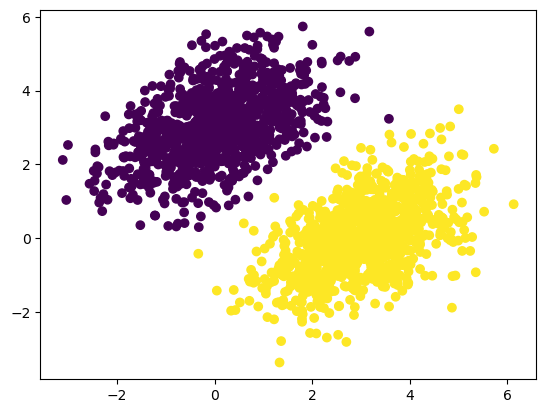

In [10]:

import matplotlib.pyplot as plt
plt.scatter(full_s[:,0],full_s[:,1], c = full_targets);

#plt.scatter(full_s[:,0],full_s[:,1], c = np.random.normal(size = len(full_targets)));

In [11]:
W = tf.Variable(initial_value = tf.random.uniform(shape = (2,1)))
b = tf.Variable(initial_value = tf.zeros(shape = (1,)))

def model(inputs):
    return tf.matmul(inputs,W) + b


def square_loss(targets, predictions):
    square = (targets-predictions)**2
    return tf.reduce_mean(square)


In [12]:
learning_rate = 0.1

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        result = model(inputs)
        loss = square_loss(targets, result)
    loss_wrt_W, loss_wrt_b =  tape.gradient(loss,[W,b]) # because W,b are tf.Variable, then their gradient is tracked by default 
    # W = W - learning_rate * loss_wrt_W 
    # ...... the above is not valid, it gives an error "W refeernced before assignment
    W.assign_sub(loss_wrt_W*learning_rate)  
    # b = b - learning_rate * loss_wrt_b
    b.assign_sub(loss_wrt_b*learning_rate)
    return loss

for step in range(40):
    loss = training_step(full_s,full_targets)
    print(f"loss at step {step}: {loss:.4f}")


loss at step 0: 0.2227
loss at step 1: 0.1078
loss at step 2: 0.0887
loss at step 3: 0.0818
loss at step 4: 0.0769
loss at step 5: 0.0725
loss at step 6: 0.0685
loss at step 7: 0.0649
loss at step 8: 0.0615
loss at step 9: 0.0585
loss at step 10: 0.0557
loss at step 11: 0.0531
loss at step 12: 0.0508
loss at step 13: 0.0486
loss at step 14: 0.0466
loss at step 15: 0.0448
loss at step 16: 0.0432
loss at step 17: 0.0416
loss at step 18: 0.0403
loss at step 19: 0.0390
loss at step 20: 0.0378
loss at step 21: 0.0367
loss at step 22: 0.0358
loss at step 23: 0.0349
loss at step 24: 0.0340
loss at step 25: 0.0333
loss at step 26: 0.0326
loss at step 27: 0.0320
loss at step 28: 0.0314
loss at step 29: 0.0308
loss at step 30: 0.0304
loss at step 31: 0.0299
loss at step 32: 0.0295
loss at step 33: 0.0291
loss at step 34: 0.0288
loss at step 35: 0.0285
loss at step 36: 0.0282
loss at step 37: 0.0279
loss at step 38: 0.0277
loss at step 39: 0.0274


_____________________
#### Take care of this error `assign() , assign_add() , assingn_sub()` instead of `=  , -= , =+`:

In [13]:
x = tf.Variable(initial_value = 3.)

def no_error():
    x.assign_add(1)
    return x

def error():
    x = x+1
    return x

In [14]:
no_error()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

In [15]:
error()

UnboundLocalError: local variable 'x' referenced before assignment

____________________

tf.Tensor(
[[1.3564663 ]
 [0.70265234]
 [1.0033726 ]
 [1.0472991 ]
 [0.7051203 ]], shape=(5, 1), dtype=float32)


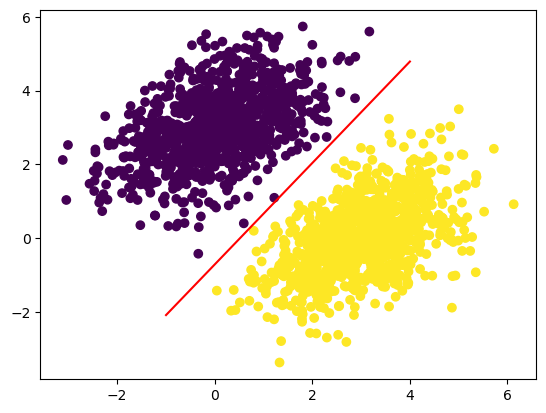

In [16]:
predictions = model(full_s)
print(predictions[:5]) 
plt.scatter(full_s[:, 0], full_s[:, 1], c=predictions[:, 0] > 0.5) # we do > 0.5 in order to convert the continous values to binary ones.


# plotting the decision boundary:
x = np.linspace (-1,4,100)

# 0.5 = x * W[0] + y * W[1] + b 
y = (-x * W[0] - (b - 0.5) ) / W[1]

plt.plot(x,y,'r-')
plt.show()

_________________________________

## OOP Note: `__call__()`:
>* It makes the object callable.
>* It is invoked automatically when we make the object of the class callable "using `()` with its name":
>* for the oridnary functions outside the calls, `__call__()` is invoked behined the scence when we call the function. Therefore: `func()` & `func.__call__()` are the same.


In [17]:
# for ordinary function:

def func(name):
    print(name)

func("omar")
func.__call__("omar")

omar
omar


In [18]:
# for classes:

class object_callable:
    def __init__(self):
        pass
    def __call__(self):
        print("call me")

        
class object_not_callable:
    def __init__(self):
        pass

o1 = object_callable()
o2 = object_not_callable()

In [19]:
o1()

call me


In [20]:
o2()

TypeError: 'object_not_callable' object is not callable

___________________


## Keras API "high-level of abstraction":
>* The fundamental data structure in neural networks is the layer, Different types of layers are appropriate for different tensor formats and different types of data processing. For instance, simple vector data, stored in rank-2 tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the `Dense` class in Keras). Sequence data, stored in rank-3 tensors of shape (samples, timesteps, features), is typically processed by recurrent layers, such as an `LSTM layer`, or `1D convolution layers (Conv1D)`. Image data, stored in rank-4 tensors, is usually processed by `2D convolution layers (Conv2D)`.
>* A **`Layer`** is an object that encapsulates some state (weights) and some computation (a forward pass). 
>>* The weights are typically defined in a `build()` (although they could also be created in the constructor, `__init__()`),
>>* and the computation is defined in the `call()` method.
>* We recommend that descendants of `Layer` Parent Class implement the following methods:
>>* `__init__()`: Defines custom layer attributes, and creates layer weights that do not depend on input shapes, using `add_weight()`, or other state.
>>* `build(self, input_shape)`: This method can be used to create weights that depend on the shape(s) of the input(s), using `add_weight()`, or otherstate. `__call__()` will automatically build the layer (if it has not been built yet) by calling `build()`.
>>* `call(self, inputs, *args, **kwargs)`: Called in **`__call__`** after making sure `build()` has been called. `call()` performs the logic of applying the layer to the `inputs`. The first invocation may additionally create state that could not be conveniently created in `build()`; see its docstring for details.
>>> `call()` and `build()` are called in the `.__call__()`. That is why we declare them with the these names not changing them.
>>* `get_config(self)`: Returns a dictionary containing the configuration used to initialize this layer. If the keys differ from the arguments in `__init__`, then override `from_config(self)` as well. This method is used when saving the layer or a model that contains this layer.

In [23]:
from tensorflow import keras
  
class SimpleDense(keras.layers.Layer):                               
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
  
    def build(self, input_shape):                                    
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),      
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
  
    def call(self, inputs):                                          
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [24]:
def __call__(self, inputs):
    if not self.built:
         self.build(inputs.shape)
         self.built = True
    return self.call(inputs)

>* ❶ All Keras layers inherit from the base Layer class.
>* ❷ Weight creation takes place in the `build()` method.
>* ❸ `add_weight()` is a shortcut method for creating weights. **It is also possible to create standalone variables and assign them as layer attributes, like `self.W = tf.Variable(tf.random.uniform(w_shape))`.**
>* ❹ We define the forward pass computation in the `call()` method.

In [25]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)   
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)  # using () with this object calls the method .__call__() which contains a call for build() then call() in our created layer class                    
print(output_tensor.shape)

(2, 32)


__________________

The layers you add to your models are dynamically built to match the shape of the incoming layer. The layers didn’t receive any information about the shape of their inputs—instead, they automatically inferred their input shape as being the shape of the first inputs they see.

In [26]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [29]:
# here what is executed in the class is only the costructor `__init__()` ...
# the `build()` & `call()` won't be called until the `.__call__()` is called by using ex: `model(inputs)`  
# I think this is implicitly done when we call .fit() and feed inputs to it. (مش متأكد أوى)

In [30]:
model.fit()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

## Calling `.compile()` ... should be called after building network architecture ... before `.fit()`:
>* It has three parameters:
>>* `Loss function (objective function)`—The quantity that will be minimized during training. It represents a measure of success for the task at hand.
>>>* Losses:
>>>* `CategoricalCrossentropy`
>>>* `SparseCategoricalCrossentropy`
>>>* `BinaryCrossentropy`
>>>* `MeanSquaredError`
>>>* `KLDivergence`
>>>* `CosineSimilarity`
>>>* Etc.
>>* `Optimizer`—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).
>>>* Optimizers:
>>>* `SGD` (with or without momentum)
>>>* `RMSprop`
>>>* `Adam`
>>>* `Adagrad`
>>>* Etc.
>>* `Metrics`—The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.
>>>* Metrics:
>>>* `CategoricalAccuracy`
>>>* `SparseCategoricalAccuracy`
>>>* `BinaryAccuracy`
>>>* `AUC`
>>>* `Precision`
>>>* `Recall`
>>>* Etc.
>* `Loss functions` are differentiated to get the direction of optimizing ... but `evaluation metrics` are not ... It is used to calculate the error if we want to know it. if we don't want to know it , we won't use it.  

In [31]:
model.compile(loss='mean_squared_error' ,
              optimizer='rmsprop',
              metrics= ['accuracy']        # metrics can be more than one
              )

# can be written like this:

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

## Calling `.fit()` to train your model, in it we pass:
>>* `inputs`"passed as `np.array` or `tf.Dataset`" 
>>* `labels` "for unsupervised_learning"
>>* `epochs`
>>* `batch_size`
>>* `validation_data` "model doesn't train on them and not **apply regularization layers on them**" "مش هركز عليها دلوقتى عشان اللخبطه هعتبرها مش موجودة"
>* calling `.history` on the returned object will output a dictionary with losses and evaluation_metric on each trainning epoch.

>* To train a model, you can use the `fit()` method, which runs **mini-batch gradient descent** for you. You can also use it to **monitor your loss and metrics on validation data,** a set of inputs that the model **doesn’t see during training**.

_______________
## ِCalling `.evaluate()` to see the validation score & test score ... `.fit()_object.history` returns the trainning score only.
_______________

## To get the output given new inputs this is what is called `inference`, we do it by two methods:
>>* predictions = `model(new_inputs)` --> this calles the method `.__call__()` on the new_inputs.
>>* predictions = `model.predict(new_inputs,batch_size = 128)`
>* `.predict()` gets predictions the same as `model()` gets but it uses batches then concatenace instead of calculating them at once. [**SEE THIS TO KNOW THE DIFFERENCE**](https://keras.io/getting_started/faq/#whats-the-difference-between-model-methods-predict-and-call)
>* but `.predict()` is **not differentiable** meaning you cannot retrieve its gradients.

_____________________